[![Open In Colab](https://raw.githubusercontent.com/crunchdao/competitions/refs/heads/master/documentation/badge/open-in-colab.svg)](https://colab.research.google.com/github/crunchdao/quickstarters/blob/master/competitions/structural-break/quickstarters/baseline/baseline.ipynb)
[![Open In Kaggle](https://raw.githubusercontent.com/crunchdao/competitions/refs/heads/master/documentation/badge/open-in-kaggle.svg)](https://www.kaggle.com/code/crunchdao/structural-break-baseline)

# Setup

The first steps to get started are:
1. Get the setup command
2. Execute it in the cell below

### >> https://hub.crunchdao.com/competitions/structural-break/submit/notebook

![Reveal token](https://raw.githubusercontent.com/crunchdao/competitions/refs/heads/master/documentation/animations/reveal-token.gif)

In [1]:
%pip install crunch-cli --upgrade --quiet --progress-bar off
!crunch setup-notebook structural-break ZNaorhiDn8Do4gCqFTWZsA8a

crunch-cli, version 7.4.0
main.py: download from https:crunchdao--competition--production.s3-accelerate.amazonaws.com/submissions/23863/main.py (6729 bytes)
requirements.txt: download from https:crunchdao--competition--production.s3-accelerate.amazonaws.com/submissions/23863/requirements.original.txt (194 bytes)
resources/cnnlstm_model.py: download from https:crunchdao--competition--production.s3-accelerate.amazonaws.com/models/25094/cnnlstm_model.py (19374 bytes)
resources/lgbm_model.py: download from https:crunchdao--competition--production.s3-accelerate.amazonaws.com/models/25094/lgbm_model.py (17887 bytes)
resources/lightgbm_features_cache.pkl: download from https:crunchdao--competition--production.s3-accelerate.amazonaws.com/models/25094/lightgbm_features_cache.pkl (5784251 bytes)
resources/tft_model.py: download from https:crunchdao--competition--production.s3-accelerate.amazonaws.com/models/25094/tft_model.py (20804 bytes)
data/X_train.parquet: download from https:crunchdao--com

# Your model

## Setup

In [3]:
pip install roerich

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 98.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [2]:
import crunch

# Load the Crunch Toolings
crunch = crunch.load_notebook()

loaded inline runner with module: <module '__main__'>

cli version: 7.4.0
available ram: 12.67 gb
available cpu: 2 core
----


In [4]:
from timeseries_utils import TimeSeriesDataLoader

In [5]:
loader = TimeSeriesDataLoader(x_path = "data/X_train.parquet",y_path="data/y_train.parquet")

Loading X data from data/X_train.parquet...
Loading y data from data/y_train.parquet...
Loaded 10001 time series


In [6]:
import roerich

True


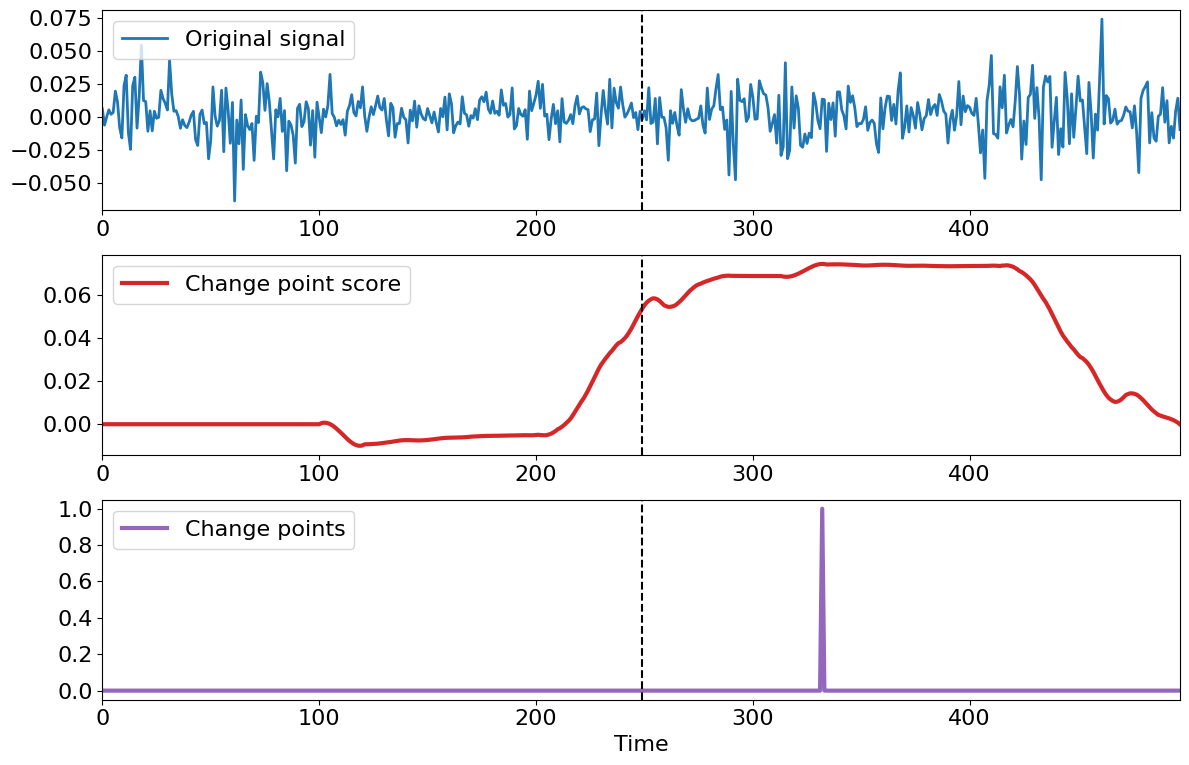

In [41]:
from roerich.change_point import OnlineNNClassifier
from roerich.change_point import SlidingWindows
from roerich.change_point import EnergyDistanceCalculator
from roerich.change_point import ChangePointDetectionRuLSIF
from roerich.change_point import OnlineNNRuLSIF

series_data, cps_true, boundary = loader.get_series_by_id(2,True)
print(cps_true)
cps_true=boundary
X=series_data.values
# change points detection
#cpd = OnlineNNClassifier(periods=1, window_size=1, lag_size=100, step=1,
                         #n_epochs=1, lr=0.01, lam=0.0001, optimizer="Adam")

#score, cps_pred = cpd.predict(X)

# visualization
#roerich.display(X, cps_true, score, cps_pred)

# change points detection
# metric = 'fd', 'mmd', 'energy'
#cpd = SlidingWindows(metric='mmd', window_size=100)

#score, cps_pred = cpd.predict(X)

# visualization
#roerich.display(X, cps_true, score, cps_pred)

# change points detection
#cpd = EnergyDistanceCalculator(window_size=100, step=1)

#score, cps_pred = cpd.predict(X)

# visualization
#roerich.display(X, cps_true, score, cps_pred)

# change points detection
#cpd = ChangePointDetectionRuLSIF(periods=1, window_size=100, step=5, n_runs=1)

#score, cps_pred = cpd.predict(X)

# visualization
#roerich.display(X, cps_true, score, cps_pred)

# change points detection
cpd = OnlineNNRuLSIF(alpha=0.1, window_size=112, lag_size=100, step=1,
                     n_epochs=100, lr=0.01, lam=0.001, optimizer="Adam")

score, cps_pred = cpd.predict(X)

# visualization
roerich.display(X, cps_true, score, cps_pred)

In [8]:
print(cps_pred)

[ 36 154 364]


In [13]:
def get_dist(cps_pred):
  for i in cps_pred:
    dist = 999
    if abs(i-boundary) < dist:
      dist = abs(i-boundary)
  return dist

In [29]:
def minmax_scale_reverse(data):
    data = np.array(data)
    return 1 - (data - data.min()) / (data.max() - data.min())

In [30]:
from sklearn.metrics import roc_auc_score
import numpy as np

In [38]:
for windows in [60,80,112]:
  y_labels = []
  preds = []
  for i in range (100):
    series_data, cps_true, boundary = loader.get_series_by_id(i,True)
    X=series_data.values
    cpd = EnergyDistanceCalculator(window_size=windows, step=1)
    score, cps_pred = cpd.predict(X)
    dist = get_dist(cps_pred)
    preds.append(dist)
    y_labels.append(cps_true)

  scaled = minmax_scale_reverse(preds)
  roc_score = roc_auc_score(y_labels, scaled)
  print(roc_score)




0.55548128342246
0.5686274509803921
0.6009358288770054


In [43]:
import numpy as np

# Initialize lists to collect data
X_list = []
y_list = []

# Loop through all series
for i in range(10000):
    series_data, cps_true, boundary = loader.get_series_by_id(i, True)

    # Convert series data to numpy array and add to list
    X_list.append(series_data.values)

    # Convert boolean label to integer and add to list
    y_list.append(int(cps_true))

# Convert lists to numpy arrays
X = np.array(X_list)
y = np.array(y_list)

print(f"X shape: {X.shape}")  # Should be (10000, num_features)
print(f"y shape: {y.shape}")  # Should be (10000,)

X shape: (10000, 498, 1)
y shape: (10000,)


In [45]:
X_flat = X.reshape(10000, -1)
print(X_flat.shape)


ValueError: cannot reshape array of size 498 into shape (10000,newaxis)

In [44]:
from roerich.density_ratio import NNClassifier
from scipy.stats import norm, uniform
import matplotlib.pyplot as plt
import numpy as np

series_data, cps_true, boundary = loader.get_series_by_id(i,True)
X=series_data.values



# direct density ratio estimation
reg = NNClassifier(n_hidden=10, n_epochs=100, batch_size=64, lr=0.01, l2=0.001)
reg.fit(X,y)
pred_ratio = reg.predict_proba_ratio(X)

# visualization
plt.scatter(X, pred_ratio, label='pred')

plt.legend()
plt.show()

AssertionError: Size mismatch between tensors

In [67]:
import roerich

In [69]:
from roerich.density_ratio import NNClassifier
from scipy.stats import norm, uniform
import matplotlib.pyplot as plt
import numpy as np
import torch
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

#print(device)

N = 1000

# generate samples
p0 = uniform(-5, 10)
p1 = norm(0, 1)
X_ff = np.concatenate((p0.rvs((N, 1)), p1.rvs((N, 1))))
y_ff = np.array([0]*N + [1]*N)
# true density ratio
true_ratio = p1.pdf(X_ff) / p0.pdf(X_ff)

# direct density ratio estimation
reg = NNClassifier(n_hidden=10, n_epochs=100, batch_size=64, lr=0.01, l2=0.001)
reg.fit(X_ff, y_ff)
pred_ratio = reg.predict_proba_ratio(X_ff)

# visualization
plt.scatter(X_ff, pred_ratio, label='pred')
plt.scatter(X_ff, true_ratio, label='true')
plt.legend()
plt.show()

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

In [47]:
print(X_ff.shape)

(2000, 1)


In [48]:
print(y_ff.shape)

(2000,)
